<a href="https://colab.research.google.com/github/0x6f736f646f/Emojidetection/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import os
print(os.listdir("."))

Using TensorFlow backend.


['.config', 'Emojidetection', 'sample_data']


In [2]:
!git clone https://github.com/0x6f736f646f/Emojidetection.git

fatal: destination path 'Emojidetection' already exists and is not an empty directory.


In [0]:
import os
os.chdir("Emojidetection")

In [4]:
os.listdir()

['.git',
 'faces.py',
 'Models',
 'Working_data',
 'README.md',
 'Human_data',
 '.gitignore',
 'getting_emoji_data.py',
 'requirements.txt',
 'Data',
 'LICENSE',
 'folder.py',
 'Notebook.ipynb']

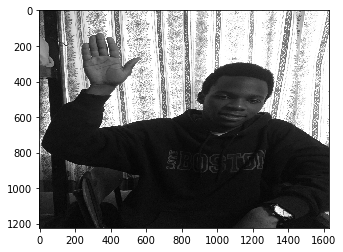

In [5]:
main_dir = "."
train_dir = "Human_data"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    new= os.path.join(path, p)
    for img in os.listdir(new):
        img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(1632, 1224))
        plt.imshow(new_img_array, cmap="gray")
        break

In [0]:
X = []
y = []
def create_test_data(path):
    for p in os.listdir(path):
        new= os.path.join(path, p)
        category = p.split("_")[0]
        for img in os.listdir(new):
            img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(1632, 1224))
            X.append(new_img_array)
            y.append(category.replace("-", " ").lower())

In [7]:
new_img_array.shape

(1224, 1632)

In [0]:
create_test_data(path)
X = np.array(X).reshape(-1,1632, 1224, 1)
y = np.array(y)

In [9]:
X.shape

(104, 1632, 1224, 1)

In [22]:
model = Sequential()
model.add(Conv2D(60,(3,3), activation="relu", input_shape=(1632, 1224, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(60,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(60,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 1630, 1222, 60)    600       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 815, 611, 60)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 813, 609, 60)      32460     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 406, 304, 60)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 404, 302, 60)      32460     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 202, 151, 60)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1830120)           0         
__________

In [0]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import keras
from keras.utils import to_categorical

In [24]:
encoder = LabelEncoder()
encoder.fit(y)
small = encoder.transform(y)
small

array([ 1,  1,  1,  1,  1,  9,  9,  9,  9,  9, 18, 18, 18, 18, 18,  8,  8,
        8,  8,  8,  5,  5,  5,  5,  5, 14, 14, 14, 14, 14,  4,  4,  4,  4,
        4, 20, 20, 20, 20, 20,  0,  0,  0,  0,  0, 11, 11, 11, 11, 19, 19,
       19, 19, 19, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 12, 12, 12, 12,
       12, 17, 17, 17, 17, 17,  6,  6,  6,  6,  6,  2,  2,  2,  2,  2, 10,
       10, 10, 10, 10,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3, 16, 16, 16,
       16, 16])

In [0]:
model.fit(X, small, epochs=10, batch_size=2, validation_split=0.2)

Train on 83 samples, validate on 21 samples
Epoch 1/10
